In [10]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import string
from nltk import word_tokenize
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('C:\\Users\\KIRHIKAGURUMURTHY\\Desktop\\PES stuff\\Projects\\University_Ranking\\Datasets\\final_iitd.csv')
wn = nltk.WordNetLemmatizer()

In [44]:
df=df.drop(columns="Unnamed: 0")
df

,Tweet_text,date,username,retweets,uni_handle,compound,Sentiment
0,The valuation subject should be post graduate ...,2020-06-12 14:45:07+00:00,shekhargupta68,0,0.0,0.5423,Positive
1,@ProfSushmaGupta @drharshvardhan @narendramodi...,2020-06-12 14:45:02+00:00,ProfSushmaGupta,0,0.0,0.9300,Positive
2,"Program: ""Nano-particles of PTFE as Extreme-pr...",2020-06-12 14:35:08+00:00,DucomTribos,0,0.0,0.5106,Positive
3,It's as real as #sunrises in the #east,2020-06-12 14:28:26+00:00,raj_knp,0,0.0,0.0000,Neutral
4,"ROPOSO- founders : Mayank, Avinash,kaushal (gr...",2020-06-12 14:28:21+00:00,Sanidhya29jhs,1,0.0,0.0516,Positive
...,...,...,...,...,...,...,...
10415,Ya productive people don't go @jamiamillia_ Un...,2020-01-01 09:24:09+00:00,thesahilb,0,0.0,0.0000,Neutral
10416,Any job vacancy there ? I am from PWD category,2020-01-01 09:12:24+00:00,tanmaymalik555,0,0.0,0.0000,Neutral
10417,.@iitdelhi #researchers develop #fabric feel t...,2020-01-01 08:54:30+00:00,IndiaDST,9,0.0,0.4019,Positive
10418,DMS Family wishes everyone a prosperous New Ye...,2020-01-01 08:27:18+00:00,DMSIITD,1,0.0,0.7896,Positive


In [45]:
df['Timestamp'] = pd.to_datetime(df['date'], infer_datetime_format = "%d/%m/%Y", utc  = False)

In [60]:
def giveday(timestamp):
    day_string = timestamp.day
    return day_string
def givemonth(timestamp):
    month_string = timestamp.month
    return month_string
df['day'] = df['Timestamp'].apply(giveday)
months = df.groupby('month')
monthcount = months['Tweet_text'].count()
monthdict = monthcount.to_dict()


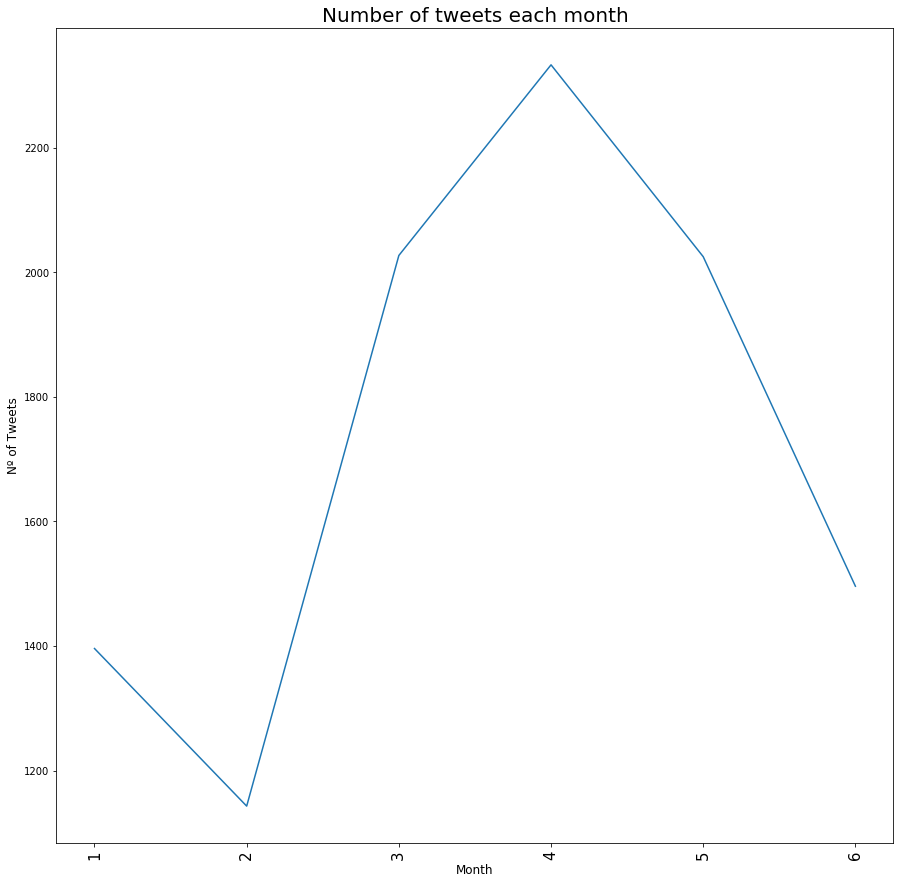

In [61]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(monthdict.keys()), list(monthdict.values()))
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Nº of Tweets', fontsize=12)
plt.xticks(list(monthdict.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets each month', fontsize = 20)
plt.show()

In [47]:
grouped = df.groupby('month')

In [51]:
Jan = grouped.get_group(1)
Feb = grouped.get_group(2)
Mar = grouped.get_group(3)
April = grouped.get_group(4)
May = grouped.get_group(5)
June = grouped.get_group(6)

In [53]:
days_Jan = Jan.groupby('day')
daycount_Jan = days_Jan['Tweet_text'].count()
timedict_Jan = daycount_Jan.to_dict()

days_Feb = Feb.groupby('day')
daycount_Feb = days_Feb['Tweet_text'].count()
timedict_Feb = daycount_Feb.to_dict()

days_Mar = Mar.groupby('day')
daycount_Mar = days_Mar['Tweet_text'].count()
timedict_Mar = daycount_Mar.to_dict()

days_April = April.groupby('day')
daycount_April = days_April['Tweet_text'].count()
timedict_April = daycount_April.to_dict()

days_May = May.groupby('day')
daycount_May = days_May['Tweet_text'].count()
timedict_May = daycount_May.to_dict()

days_June = June.groupby('day')
daycount_June = days_June['Tweet_text'].count()
timedict_June = daycount_June.to_dict()

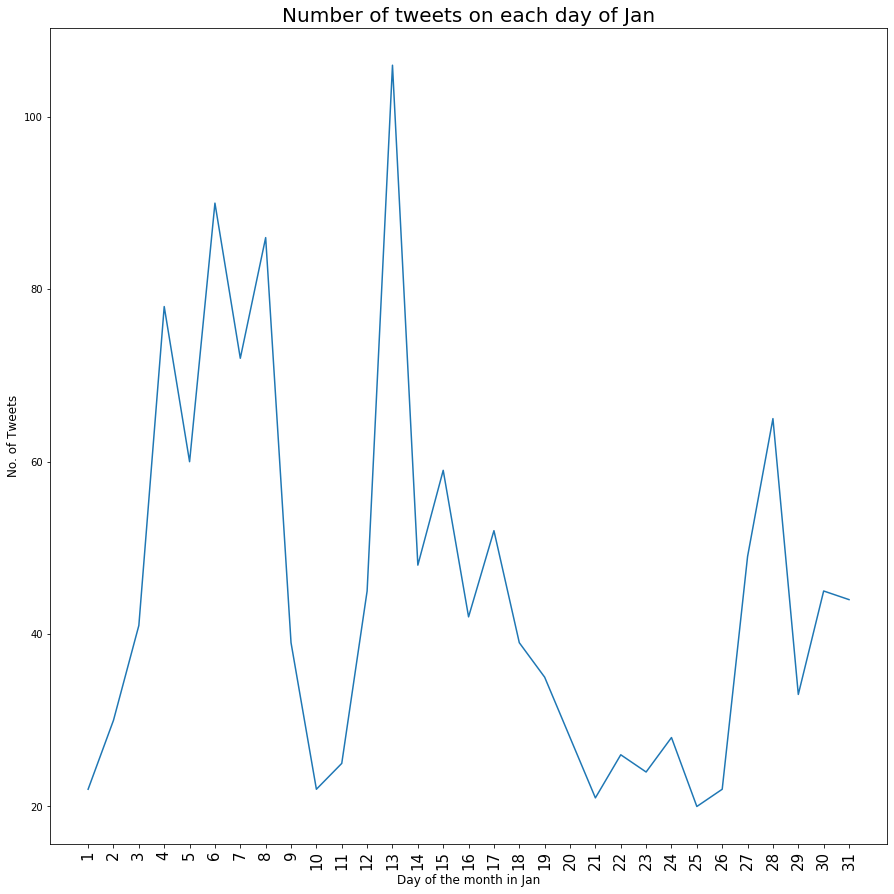

In [54]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Jan.keys()), list(timedict_Jan.values()))
plt.xlabel('Day of the month in Jan', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Jan.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Jan', fontsize = 20)
plt.show()

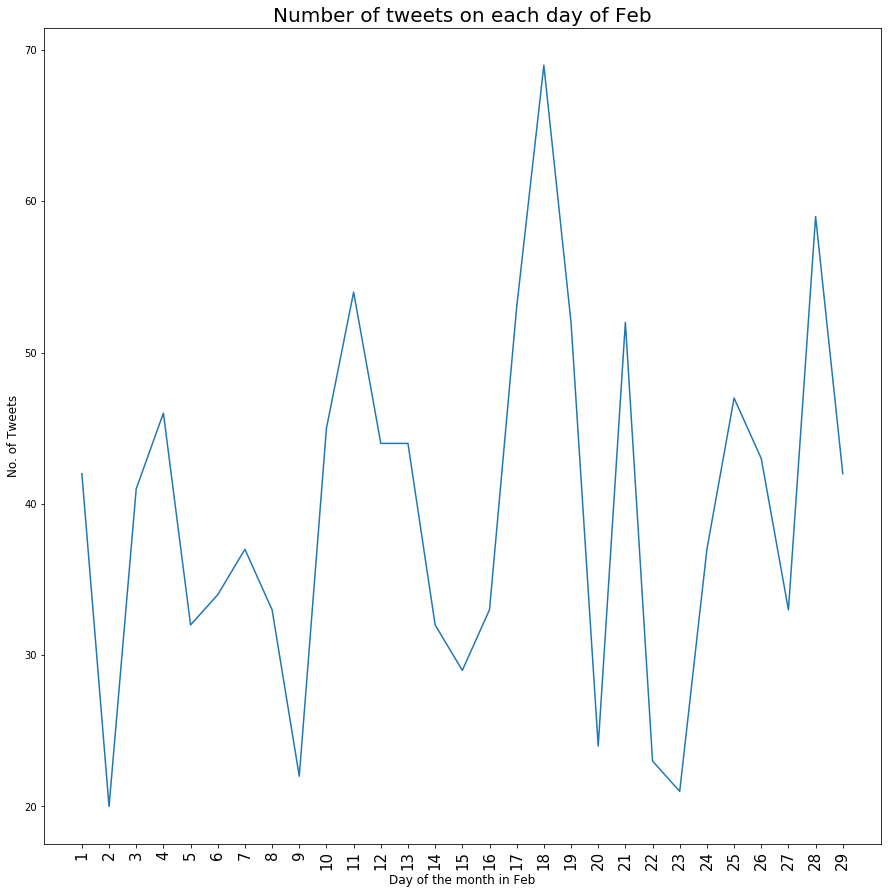

In [55]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Feb.keys()), list(timedict_Feb.values()))
plt.xlabel('Day of the month in Feb', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Feb.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Feb', fontsize = 20)
plt.show()

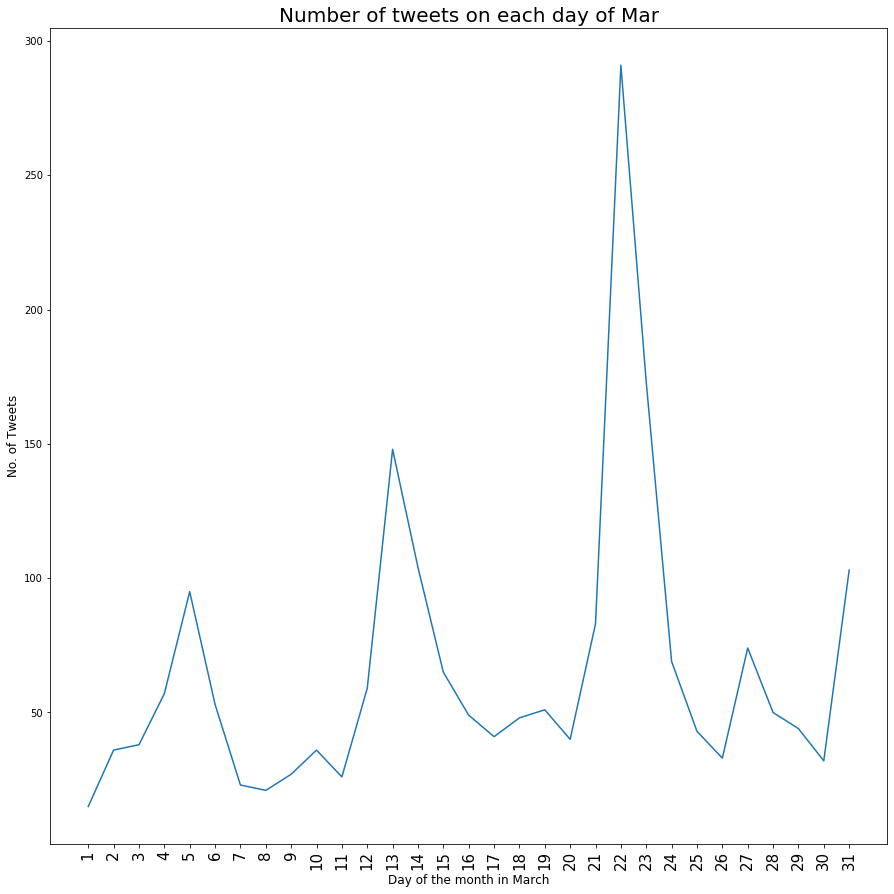

In [56]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_Mar.keys()), list(timedict_Mar.values()))
plt.xlabel('Day of the month in March', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_Mar.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of Mar', fontsize = 20)
plt.show()

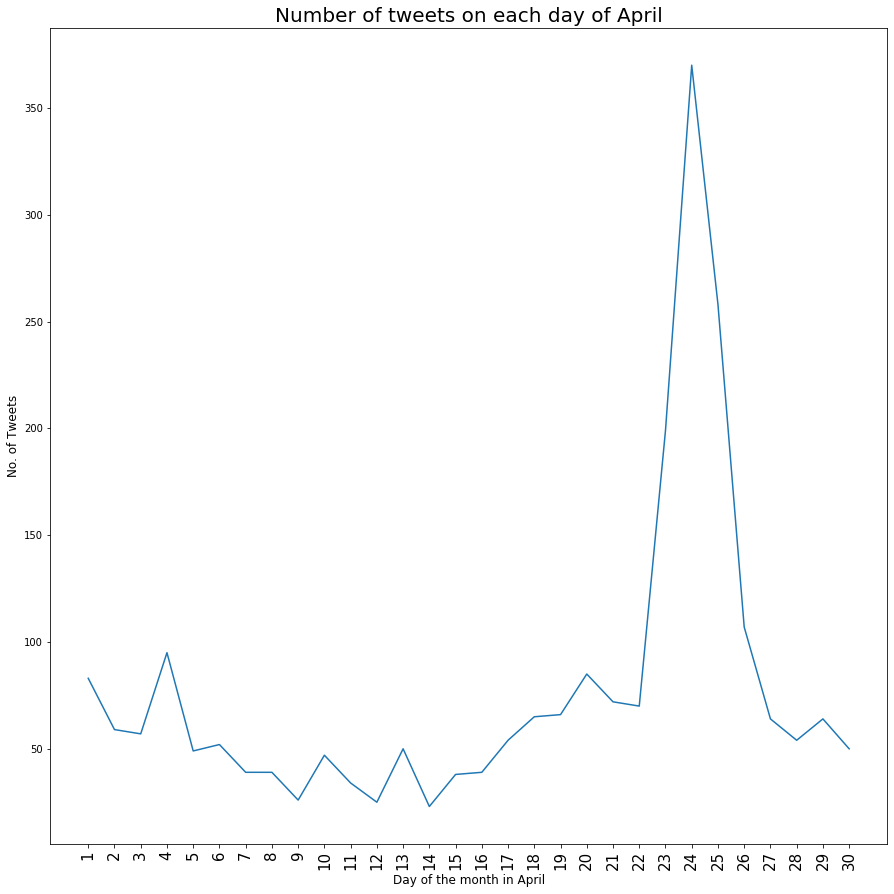

In [57]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_April.keys()), list(timedict_April.values()))
plt.xlabel('Day of the month in April', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_April.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of April', fontsize = 20)
plt.show()

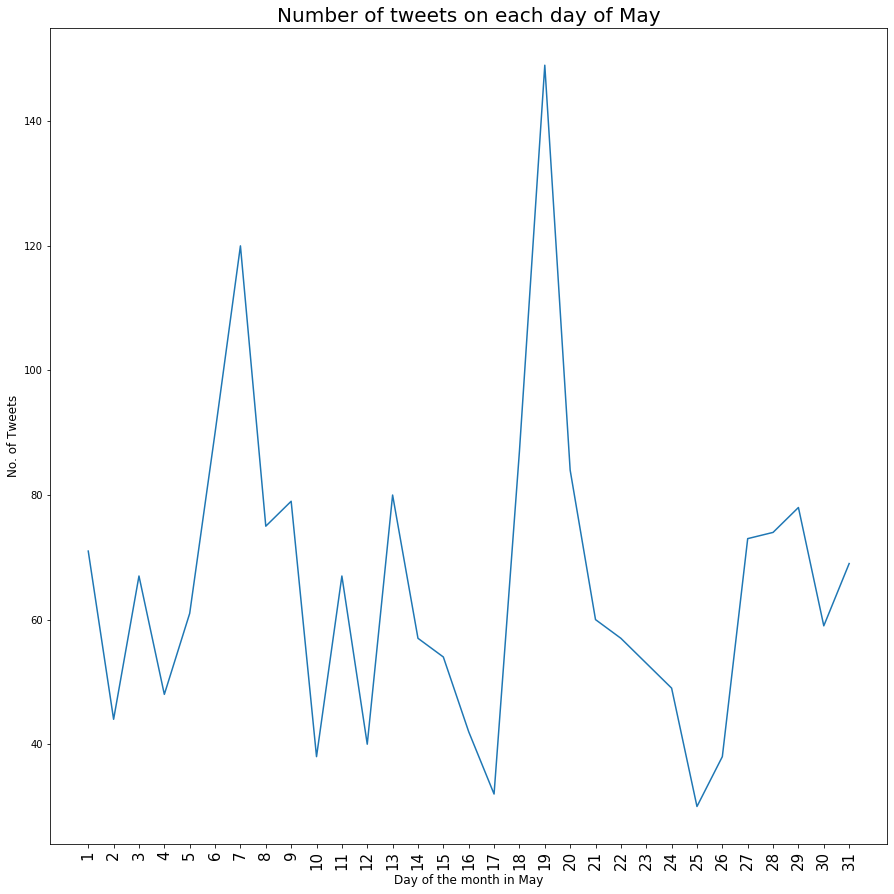

In [58]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_May.keys()), list(timedict_May.values()))
plt.xlabel('Day of the month in May', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_May.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of May', fontsize = 20)
plt.show()

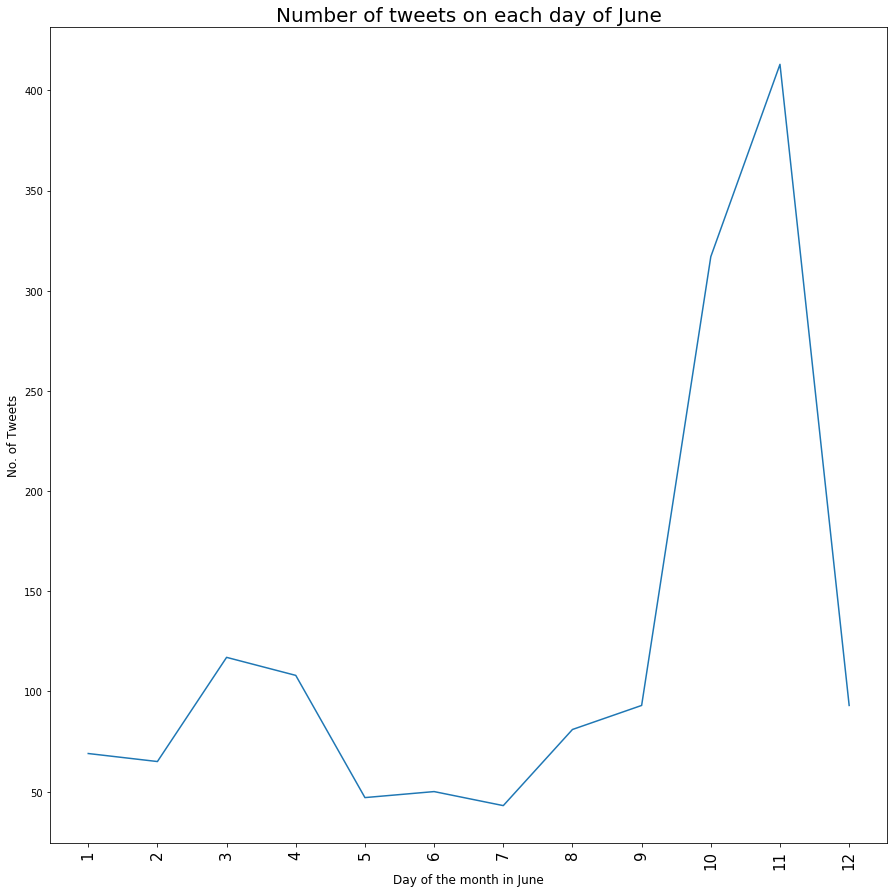

In [59]:
fig = plt.figure(figsize = (15,15))
plt.plot(list(timedict_June.keys()), list(timedict_June.values()))
plt.xlabel('Day of the month in June', fontsize = 12)
plt.ylabel('No. of Tweets', fontsize=12)
plt.xticks(list(timedict_June.keys()), fontsize=15, rotation=90)
plt.title('Number of tweets on each day of June', fontsize = 20)
plt.show()